taller 2

importar librerias

In [92]:
!pip install ydata-profiling

In [93]:
import matplotlib.cm as cm

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ydata_profiling import ProfileReport


carga de archivos

In [94]:
reviewsoriginal = pd.read_csv("/content/reviews.csv")
listingsoriginal =pd.read_csv("/content/listings.csv")
calendaroriginal =pd.read_csv("/content/calendar.csv")

<ipython-input-94-cd3bc4a8b7e6>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendaroriginal =pd.read_csv("/content/calendar.csv")


In [95]:
listingsoriginal.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13188,https://www.airbnb.com/rooms/13188,20240615011559,2024-06-15,city scrape,Garden level studio in ideal loc.,Garden level studio suite with garden patio - ...,The uber hip Main street area is a short walk ...,https://a0.muscache.com/pictures/8408188/e1af6...,51466,...,4.93,4.89,4.81,24-157388,t,3,3,0,0,1.74
1,13358,https://www.airbnb.com/rooms/13358,20240615011559,2024-06-15,city scrape,Designer Downtown Vancouver suite,Iconic Electra Building.<br />A Vancouver Land...,2 blocks away from the shopping area of Robson...,https://a0.muscache.com/pictures/miso/Hosting-...,52116,...,4.79,4.91,4.65,24-159219,f,1,1,0,0,3.04
2,13490,https://www.airbnb.com/rooms/13490,20240615011559,2024-06-15,city scrape,Vancouver's best kept secret,This apartment rents for one month blocks of t...,"In the heart of Vancouver, this apartment has ...",https://a0.muscache.com/pictures/73394727/79d5...,52467,...,4.97,4.80,4.89,NaN,f,1,1,0,0,0.66
3,14267,https://www.airbnb.com/rooms/14267,20240615011559,2024-06-15,city scrape,EcoLoft Vancouver,"The Ecoloft is located in the lovely, family r...",We live in the centre of the city of Vancouver...,https://a0.muscache.com/pictures/3646de9b-934e...,56030,...,4.68,4.77,4.71,21-156500,f,1,1,0,0,0.20
4,16254,https://www.airbnb.com/rooms/16254,20240615011559,2024-06-15,city scrape,Close to PNE/Hastings Park Garden level suite,2 Bedroom garden level guest suite.(lower leve...,"Good Eats, Cute Shops and all the personality ...",https://a0.muscache.com/pictures/d0cdc9b4-5937...,63238,...,5.00,4.86,4.29,NaN,f,1,1,0,0,0.10


entendimiento inicial datos

In [96]:
listingsoriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6233 entries, 0 to 6232
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6233 non-null   int64  
 1   listing_url                                   6233 non-null   object 
 2   scrape_id                                     6233 non-null   int64  
 3   last_scraped                                  6233 non-null   object 
 4   source                                        6233 non-null   object 
 5   name                                          6233 non-null   object 
 6   description                                   6146 non-null   object 
 7   neighborhood_overview                         3889 non-null   object 
 8   picture_url                                   6233 non-null   object 
 9   host_id                                       6233 non-null   i

In [97]:
listingsoriginal.describe()


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.233000e+03,6.233000e+03,6.233000e+03,6233.000000,6233.000000,0.0,6233.000000,6233.000000,6233.000000,4987.000000,...,5224.000000,5223.000000,5224.000000,5223.000000,5223.000000,6233.000000,6233.000000,6233.000000,6233.000000,5235.000000
mean,5.043510e+17,2.024062e+13,2.020668e+08,12.005455,18.191080,NaN,49.262162,-123.111958,3.569068,1.354823,...,4.767349,4.851731,4.870392,4.820544,4.678198,7.233275,6.165731,1.043960,0.022140,1.797563
std,4.724176e+17,0.000000e+00,1.903563e+08,44.616170,61.035759,NaN,0.021212,0.039072,2.076232,0.707020,...,0.410399,0.315454,0.327819,0.287093,0.402413,20.203985,20.136807,3.368089,0.235267,1.899803
min,1.318800e+04,2.024062e+13,6.033000e+03,1.000000,1.000000,NaN,49.202960,-123.217730,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.448643e+07,2.024062e+13,2.773780e+07,1.000000,1.000000,NaN,49.249560,-123.131350,2.000000,1.000000,...,4.730000,4.820000,4.870000,4.770000,4.610000,1.000000,1.000000,0.000000,0.000000,0.300000
50%,6.556051e+17,2.024062e+13,1.358864e+08,2.000000,3.000000,NaN,49.268440,-123.114290,3.000000,1.000000,...,4.890000,4.940000,4.960000,4.900000,4.760000,1.000000,1.000000,0.000000,0.000000,1.030000
75%,9.479048e+17,2.024062e+13,3.742240e+08,5.000000,8.000000,NaN,49.278930,-123.088380,4.000000,1.500000,...,5.000000,5.000000,5.000000,5.000000,4.880000,3.000000,2.000000,0.000000,0.000000,2.860000
max,1.178520e+18,2.024062e+13,5.833237e+08,706.000000,1117.000000,NaN,49.294360,-123.023680,16.000000,10.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,132.000000,132.000000,29.000000,3.000000,13.650000


In [98]:
listingsoriginal.shape

(6233, 75)

In [99]:
reviewsoriginal.shape

(272601, 2)

In [100]:
reviewsoriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272601 entries, 0 to 272600
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  272601 non-null  int64 
 1   date        272601 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.2+ MB


In [101]:
reviewsoriginal.head()

,listing_id,date
0,13188,2010-02-21
1,13188,2010-08-27
2,13188,2010-09-06
3,13188,2010-09-20
4,13188,2011-04-25


In [102]:
#profilelist=ProfileReport(listingsoriginal)
#profilelist

Entendimiento del dataset

1.Por el lado de el listado de airbnbs, hay  6233 entradas y 75 variables qu las acompañan.Los datos principales son strings(object) y números tanto enteros como flotantes, no se ven variables booleanas exceptuando has_availability, la cual define si esta disponible el airbnb o no. Por el lado de las reviews hay 122487 entradas con 6 variables.

2. De las 75 variables de listings hay varias métricas numericas  que pueden soportar  oportunidades de interés para un inversionista,estas o son métricas que aportan granularidad/filtro/categorizacion o son directamente medidas como precio o rating. Por el lado de reviews la mayoría son de identificación exceptuando la reseña en sí(comments) y la fecha.

3. Para listings,la mayoría de columnas están completas pero las que tienen nulos lo tienen en gran medida. a pesar de esto para algunas columnas estos nulos  los podemos o inputar o darles significado según otras.por ejemplo, los nulos en bathroom los podemos llenar según los resultados en amenities, dado que es concevible asumir que si en Bathrooms hay nulo pero en Amenities mencionan "Bathub","Toilet",etc. debería existir un baño.


4. Para efectos de lo que se busca(patrones de oportunidad de inversión) las variables mas utiles principalmente son Price y Rating. agregado a estas  lo ideal serían variables que describan una propuesta de valor  o clasificación determinante para una persona, por lo que elegiriamos amenities,room_type y availability 365, para efectos de buscar que airbnbs son los mas y menos disponibles según sus comodidades y tipo de cuarto.

In [103]:
listingsoriginal["amenities"][1]

'["City skyline view", "Dishes and silverware", "Shampoo", "Toaster", "Bathtub", "Cleaning products", "Essentials", "Central air conditioning", "Hair dryer", "Wifi", "Microwave", "Wine glasses", "Clothing storage: closet", "Freezer", "Stainless steel electric stove", "Shower gel", "Kitchen", "Iron", "Baking sheet", "Hangers", "Free washer \\u2013 In building", "Oven", "Room-darkening shades", "Hot water", "Fire extinguisher", "Body soap", "Dishwasher", "Refrigerator", "Cooking basics", "Coffee", "Bed linens", "Coffee maker: drip coffee maker", "Conditioner", "TV with Netflix", "Heating", "Dining table", "Paid parking off premises", "Free dryer \\u2013 In building", "Elevator", "Single level home", "Carbon monoxide alarm", "Smoke alarm", "Hot water kettle", "Long term stays allowed"]'

Analisis Univariado Variables Seleccionadas

In [104]:
filtered=listingsoriginal[["price","review_scores_rating","amenities","room_type","availability_365"]]

precio:

Para manejarla bien, hay que quitarle el simbolo de dolar y posteriormente cambiarla de string a float.para propositos de analisis quitaremos los nulos

In [105]:
filtered["price"]=filtered['price'].dropna().str.replace(r'[^0-9.]', '', regex=True).astype(float)
filtered["price"]

<ipython-input-105-7e11826e06a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["price"]=filtered['price'].dropna().str.replace(r'[^0-9.]', '', regex=True).astype(float)


,price
0,160.0
1,261.0
2,225.0
3,180.0
4,800.0
...,...
6228,171.0
6229,71.0
6230,257.0
6231,354.0


In [106]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6233 entries, 0 to 6232
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 4989 non-null   float64
 1   review_scores_rating  5235 non-null   float64
 2   amenities             6233 non-null   object 
 3   room_type             6233 non-null   object 
 4   availability_365      6233 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 243.6+ KB


In [107]:
filtered.describe()

,price,review_scores_rating,availability_365
count,4989.000000,5235.000000,6233.000000
mean,266.745841,4.790451,129.028879
std,923.701419,0.371124,112.441620
min,14.000000,1.000000,0.000000
25%,128.000000,4.750000,28.000000
50%,189.000000,4.880000,100.000000
75%,290.000000,5.000000,222.000000
max,57221.000000,5.000000,365.000000


<Axes: ylabel='price'>

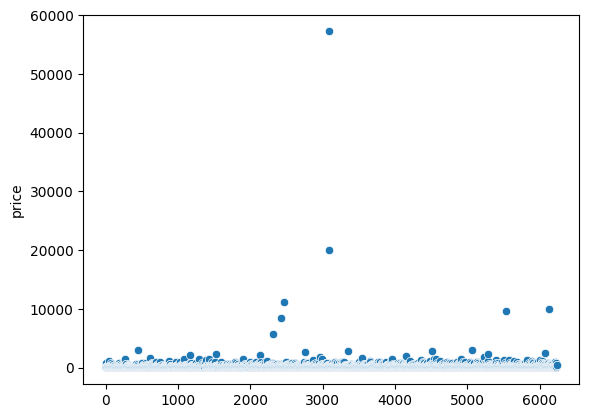

In [108]:
sns.scatterplot(filtered['price'])

<Axes: xlabel='price', ylabel='Count'>

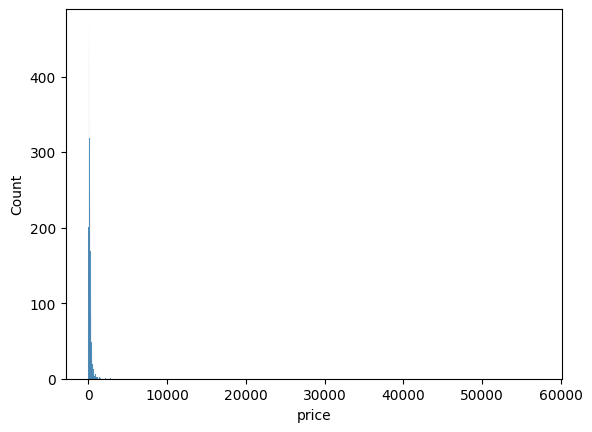

In [109]:
sns.histplot(filtered["price"])

In [110]:
filtered["price"].median()

189.0

Para precio tenemos outliers  con precios muy caros para los airbnb en vancouver. La distribución esta altamente sesgada a la izquierda por lo que la mayoría de airbnbs están dentro de precios bajos. Tenemos una media de 266.74 y una desviación estandar de 923(por los outliers).La mediana es de 189.0

reviews

<Axes: xlabel='review_scores_rating', ylabel='Count'>

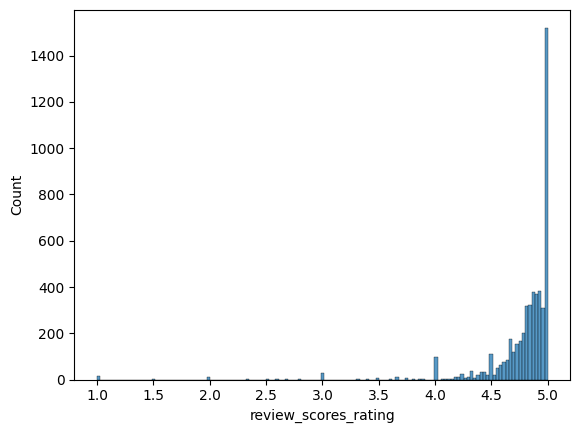

In [111]:
sns.histplot(filtered["review_scores_rating"])

<Axes: ylabel='review_scores_rating'>

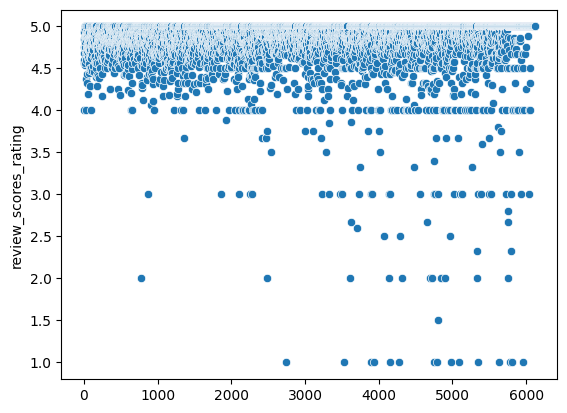

In [112]:
sns.scatterplot(filtered["review_scores_rating"])

In [113]:
filtered["review_scores_rating"].median()

4.88

La distribución esta fuertemente sesgada hacia la izquierda, por lo que la mayoría de personas le dan un buen rating a sus airbnb en la ciudad de vancouver. la media de rating es 4.79 con una desviación de 0.73. la mediana es 4.88

availability_365

<Axes: xlabel='availability_365', ylabel='Count'>

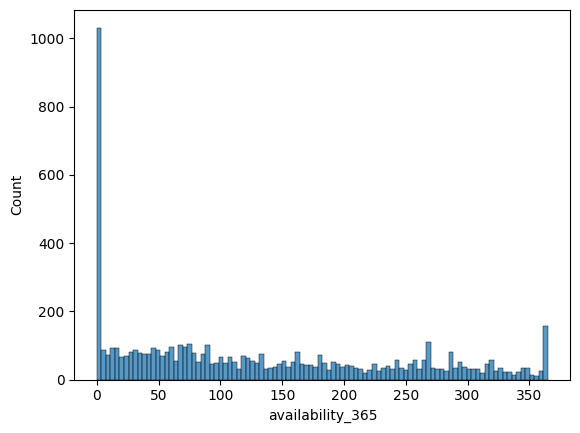

In [114]:
sns.histplot(filtered["availability_365"],bins=100)

<Axes: ylabel='availability_365'>

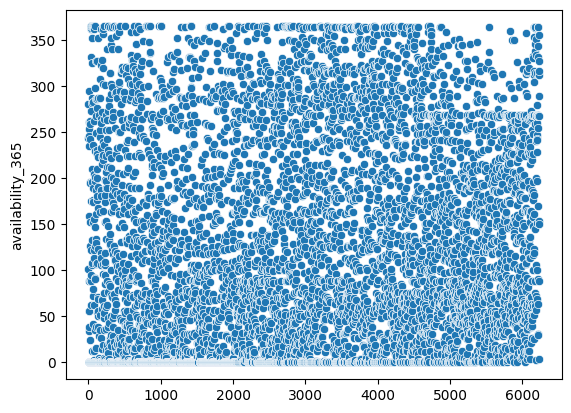

In [115]:
sns.scatterplot(filtered["availability_365"])

In [116]:
filtered["availability_365"].median()

100.0

((array([-3.59229396, -3.3543114 , -3.22300984, ...,  3.22300984,
          3.3543114 ,  3.59229396]),
  array([  0,   0,   0, ..., 365, 365, 365])),
 (100.88941341191418, 149.77181366753368, 0.967253193592818))

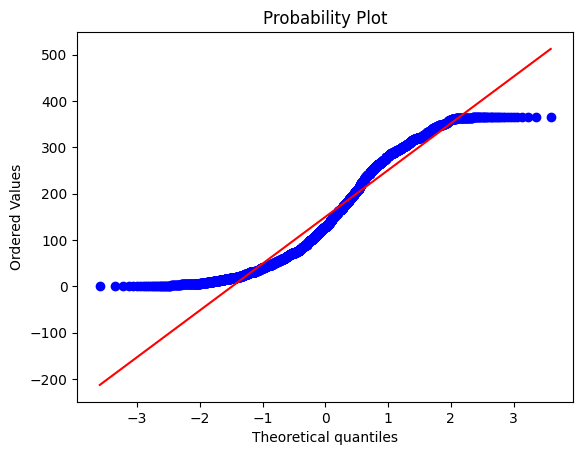

In [117]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(filtered2['availability_365'], dist="norm", plot=plt)

Hay un gran número de airbnbs que están completos para el año, pero la mayoría se distribuyen de manera relativamente uniforme los días de disponibilidad. Hay curiosidad en los airbnbs que están disponibles los 365 días del año, lo mas probable es que estos correspondan a hoteles. La mediana de días disponibles es 100,con una media de 129 y una desviación estandar de 112. La probability plot muestra comportamiento sigmoideo entre 0 y 365 lo que implica que hay fenomeno de cola larga,como se evidencia en el histograma

tipo de habitación

<Axes: xlabel='room_type', ylabel='count'>

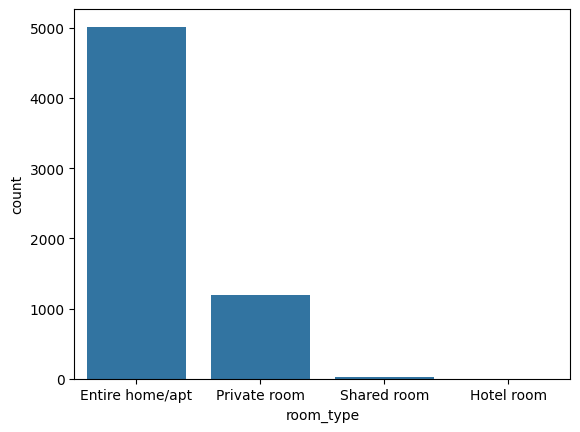

In [118]:
sns.barplot(filtered["room_type"].value_counts())

In [119]:
filtered["room_type"].value_counts()

,count
room_type,
Entire home/apt,5015
Private room,1192
Shared room,23
Hotel room,3


La mayoría de airbnbs son de Entire home/apt.

amenities

se harán transformaciones temporales en los datos para mejor entendimiento y procesamiento de graficas. Para este caso,vamos a hacer encoding de los elementos en cada variable de amenities y tener el conteo de amenities para cada lugar

In [120]:
filtered["amenities"]

,amenities
0,"[""Luggage dropoff allowed"", ""Ethernet connecti..."
1,"[""City skyline view"", ""Dishes and silverware"",..."
2,"[""Luggage dropoff allowed"", ""Gym"", ""Ethernet c..."
3,"[""Dishes and silverware"", ""Shampoo"", ""Essentia..."
4,"[""Luggage dropoff allowed"", ""Dishes and silver..."
...,...
6228,"[""BBQ grill"", ""Paid parking on premises"", ""Car..."
6229,"[""Heating"", ""Dining table"", ""Oven"", ""Shampoo"",..."
6230,"[""Hot tub"", ""TV"", ""Noise decibel monitors on p..."
6231,"[""Hot tub"", ""TV"", ""Noise decibel monitors on p..."


In [121]:
all_amenities = set(amenity for sublist in filtered['amenities'] for amenity in sublist.split(','))
all_amenities

{' "Shampoo/ conditioner and shower Gel is provided.  body soap"',
 ' "Mabe stainless steel gas stove"',
 '["TV with Chromecast"',
 ' "42 inch HDTV with Roku"',
 ' "35 inch TV with standard cable"',
 ' gas"',
 ' "Soap Dispensery shampoo"',
 ' set out for you.  body soap"',
 ' "Ikea hot plate stainless steel electric stove"',
 ' "Fast wifi \\u2013 54 Mbps"',
 '["Black & Deck stainless steel single oven"',
 ' "Kitchenaid Gas Oven stainless steel oven"',
 ' "56 inch HDTV"',
 ' "Fast wifi \\u2013 451 Mbps"',
 ' "50 inch TV with HBO Max',
 ' "Fast wifi \\u2013 325 Mbps"',
 ' "40 inch HDTV with Fire TV"',
 ' "Heating"]',
 ' "46 inch HDTV"',
 ' "100% ECO Friendly Organic - Kirkland body soap"',
 ' "Fast wifi \\u2013 329 Mbps"',
 ' "Tresseme shampoo"',
 ' "Valley view"',
 ' "Sun loungers"',
 ' "Whirlpool  stainless steel oven"',
 ' "Free driveway parking on premises \\u2013 2 spaces"]',
 ' Keurig coffee machine',
 ' "Booster seat high chair"',
 ' "1950\\u2019s cute fridge refrigerator"',
 ' "S

In [122]:
encodedDF=pd.DataFrame()
for amenity in all_amenities:
    encodedDF[amenity] = filtered['amenities'].apply(lambda x: x.count(amenity))

Se han truncado las últimas 5000 líneas del flujo de salida.
<ipython-input-122-da1112cd7e67>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encodedDF[amenity] = filtered['amenities'].apply(lambda x: x.count(amenity))
<ipython-input-122-da1112cd7e67>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encodedDF[amenity] = filtered['amenities'].apply(lambda x: x.count(amenity))
<ipython-input-122-da1112cd7e67>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

In [141]:
encodedDF

,"""Shampoo/ conditioner and shower Gel is provided. body soap""","""Mabe stainless steel gas stove""","[""TV with Chromecast""","""42 inch HDTV with Roku""","""35 inch TV with standard cable""","gas""","""Soap Dispensery shampoo""","set out for you. body soap""","""Ikea hot plate stainless steel electric stove""","""Fast wifi \u2013 54 Mbps""",...,"""Whirlpool stainless steel stove""","""Skate ramp""","""Mini fridge with feezer refrigerator""","""Toaster""","""Fast wifi \u2013 155 Mbps""","[""Clothing storage: wardrobe and dresser""","""Fast wifi \u2013 435 Mbps""","""Skull Candy sound system with Bluetooth and aux""","""Kevin Murphy shampoo""","""48 inch TV with Chromecast"""
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
totals = encodedDF.sum()

# Sort the totals in ascending order
totals_sorted = totals.sort_values(ascending=False)
totals_sorted

,0
"""Smoke alarm""",6008
"""Kitchen""",5801
"""Wifi""",5521
"""Essentials""",5290
"""Hot water""",5225
...,...
"""Toshiba stainless steel oven""",1
"""Folding or convertible high chair""",1
"""Smart tv sound system with Bluetooth and aux""",1
"[""Fast wifi \u2013 540 Mbps""",1


In [125]:
df_totals = totals_sorted.reset_index()
df_totals.columns = ['Amenity', 'Total']
df_totals

,Amenity,Total
0,"""Smoke alarm""",6008
1,"""Kitchen""",5801
2,"""Wifi""",5521
3,"""Essentials""",5290
4,"""Hot water""",5225
...,...,...
2840,"""Toshiba stainless steel oven""",1
2841,"""Folding or convertible high chair""",1
2842,"""Smart tv sound system with Bluetooth and aux""",1
2843,"[""Fast wifi \u2013 540 Mbps""",1


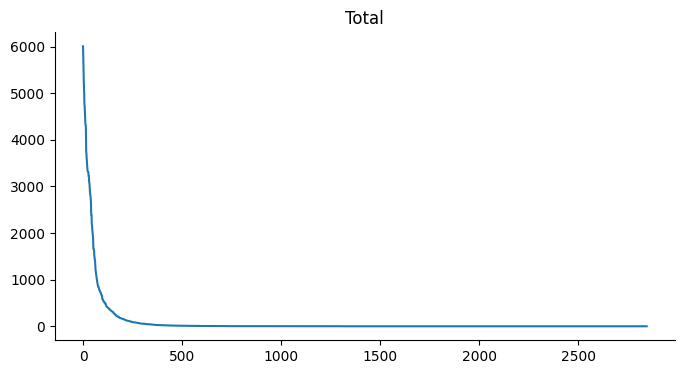

In [126]:
from matplotlib import pyplot as plt
df_totals['Total'].plot(kind='line', figsize=(8, 4), title='Total')
plt.gca().spines[['top', 'right']].set_visible(False)

La amenity mas común es la alarma de incendio, las menos comunes terminan siendo amenidades muy específicas, como una estufa Fisher Paykal.Se observa un efecto de cola larga por lo que hay pocas amenities que están presentes en  la mayoría de lugares(usualmente seguridad o cosas básicas pero no críticas,como internet) pero la gran parte tienen una frecuencia relativamente baja,y esto puede ser por el bajo impacto de estas amenities,que sean de nicho,etc.


# Estrategia de Analisis

Como inversor, el objetivo principal es maximizar el retorno sobre la inversión, lo que implica identificar factores clave que generen valor y permitan un crecimiento sostenido en el tiempo. Para ello, el enfoque del análisis se centrará en examinar cómo diferentes comodidades y tipos de habitación impactan tanto en el precio de alquiler como en la calificación (rating) de las propiedades. Estos factores se analizarán en conjunto con la disponibilidad, para determinar la correlación entre características específicas de las propiedades y su demanda en el mercado.

La estrategia clave será:

Análisis del impacto de las comodidades: Identificar las comodidades que generan mayor valor añadido en términos de precio de alquiler y rating. Esto se hará evaluando la frecuencia de las comodidades presentes en propiedades de alto rendimiento y contrastando con aquellas de menor demanda.

Tipo de habitación y su influencia: Evaluar cómo los distintos tipos de habitación (por ejemplo, estudio, apartamento completo, etc.) afectan el precio y el rating. Se busca determinar si existe una relación directa entre el tipo de habitación y la rentabilidad de la inversión.

Disponibilidad y demanda: Cruzar la información de precios y rating con la disponibilidad de las propiedades para entender patrones de ocupación. El objetivo es detectar si ciertas combinaciones de comodidades y tipos de habitación presentan una mayor tasa de ocupación, lo que podría señalar una oportunidad de crecimiento en áreas subvaloradas o con alta demanda.

# Desarrollo de estrategia

In [127]:
filtered2=filtered[["price","review_scores_rating","availability_365","room_type"]]
filtered2

,price,review_scores_rating,availability_365,room_type
0,160.0,4.85,281,Entire home/apt
1,261.0,4.68,102,Entire home/apt
2,225.0,4.93,244,Entire home/apt
3,180.0,4.76,56,Entire home/apt
4,800.0,4.57,0,Entire home/apt
...,...,...,...,...
6228,171.0,NaN,356,Entire home/apt
6229,71.0,NaN,89,Private room
6230,257.0,NaN,328,Entire home/apt
6231,354.0,NaN,317,Entire home/apt


In [128]:
filtered2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6233 entries, 0 to 6232
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 4989 non-null   float64
 1   review_scores_rating  5235 non-null   float64
 2   availability_365      6233 non-null   int64  
 3   room_type             6233 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 194.9+ KB


Vamos a hacer encoding de los tipos de habitación usando label encoding para facilitar gráficas

In [129]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Aplicar el encoding a la columna 'room_type'
filtered2['room_type_encoded'] = le.fit_transform(filtered2['room_type'])

<Axes: >

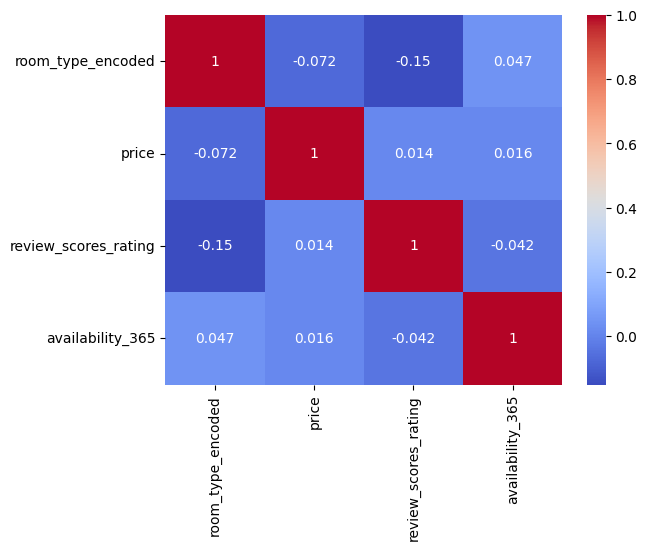

In [130]:
sns.heatmap(filtered2[["room_type_encoded","price","review_scores_rating","availability_365"]].corr(), annot=True, cmap='coolwarm')

Validamos que no haya información redudante usando correlación

##Garantía calidad de datos:Nulos

Tenemos que manejar los nulos en price y rating.

con los scatterplots de price y availabiity sabemos que tienen geometria plana por lo que la correlación va a ser al menos parcialmente capturada linearmente.El problema es que por los valores de  correlación no podemos deducir directamente estos nulos de otras variables.

El otro problema es que por lo menos para el precio, el 20% de las entradas tienen valor nulo,por lo que llenarlos con valores estadístico puede dar sesgo.

En ese orden de ideas, vamos a quitar las filas donde el precio sea nulo por falta de  una técnica para inputar estos nulos sin sesgar o tergiversar los analisis


##Garantía calidad de datos:Outliers


Por otro lado,hay que quitar los outliers de precio,para esto vamos a reducir los precios a valores entre 0 y 15000.

In [131]:
filtered2=filtered2[filtered2["price"]>0]
filtered2=filtered2[filtered2["price"]<500]
filtered2=filtered2.dropna()
filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3946 entries, 0 to 6118
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 3946 non-null   float64
 1   review_scores_rating  3946 non-null   float64
 2   availability_365      3946 non-null   int64  
 3   room_type             3946 non-null   object 
 4   room_type_encoded     3946 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 185.0+ KB


In [132]:
filtered2["review_scores_rating"]

,review_scores_rating
0,4.85
1,4.68
2,4.93
3,4.76
9,4.98
...,...
6095,5.00
6100,5.00
6116,5.00
6117,5.00


In [133]:
filtered2.describe()

,price,review_scores_rating,availability_365,room_type_encoded
count,3946.000000,3946.000000,3946.000000,3946.000000
mean,201.967055,4.795008,149.223771,0.362899
std,99.744284,0.364390,103.947834,0.775795
min,20.000000,1.000000,0.000000,0.000000
25%,126.000000,4.750000,59.000000,0.000000
50%,179.000000,4.880000,128.000000,0.000000
75%,260.000000,5.000000,239.000000,0.000000
max,499.000000,5.000000,365.000000,3.000000


# Tipo de habitación y su influencia

<Axes: xlabel='room_type', ylabel='price'>

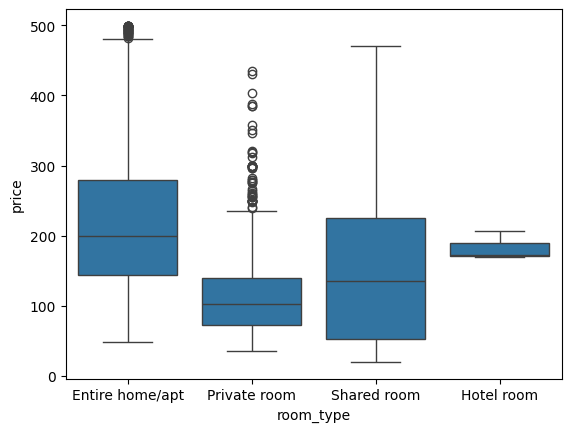

In [134]:
sns.boxplot(x='room_type', y='price', data=filtered2)


<Axes: xlabel='room_type', ylabel='review_scores_rating'>

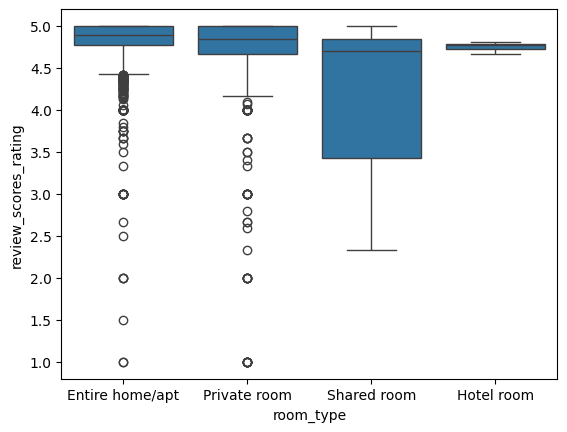

In [135]:
sns.boxplot(x='room_type', y='review_scores_rating', data=filtered2)


Del boxplot podemos evidenciar que los cuartos compartidos son los que mas variación presentan en las calificaciones.Agregado a eso,la mayoría de estadías se encuentran dentro de 20-500 USD. las excepciones se encuentran principalmente en airbnbs de casas completas(lo cual es relativamente esperado). En general,los hoteles son los que tienen la calificación mas "precisa" comparado con las otras 3 alternativas,aproximadamente en un rango de 4.75-4.85 para sus ratings.





#Disponibilidad Y Demanda

<Axes: xlabel='availability_365', ylabel='review_scores_rating'>

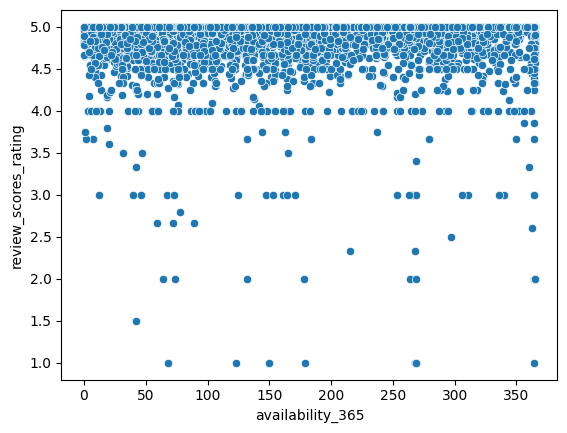

In [136]:
sns.scatterplot(x='availability_365', y='review_scores_rating', data=filtered2)

<Axes: xlabel='availability_365', ylabel='price'>

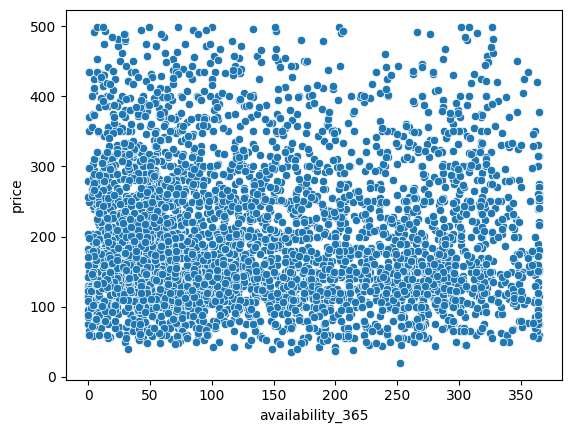

In [137]:
sns.scatterplot(x='availability_365', y='price', data=filtered2)


<Axes: >

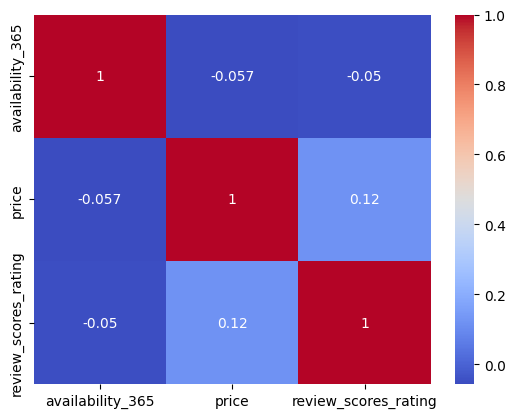

In [138]:
sns.heatmap(filtered2[["availability_365","price","review_scores_rating"]].corr(), annot=True, cmap='coolwarm')

Basandonos en la geometría plana de los scatterplot  y el heatmap de correlación lineal da valores cercanos a 0, no se puede decir con seguridad que haya alguna relación lineal entre los precios/rating y la disponibilidad al año.

## Prueba de relaciones no lineales

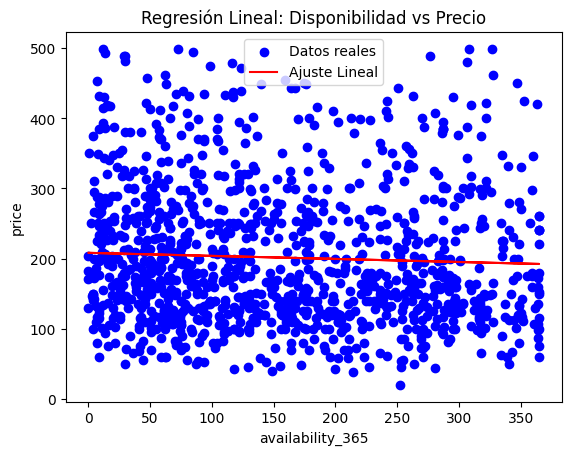

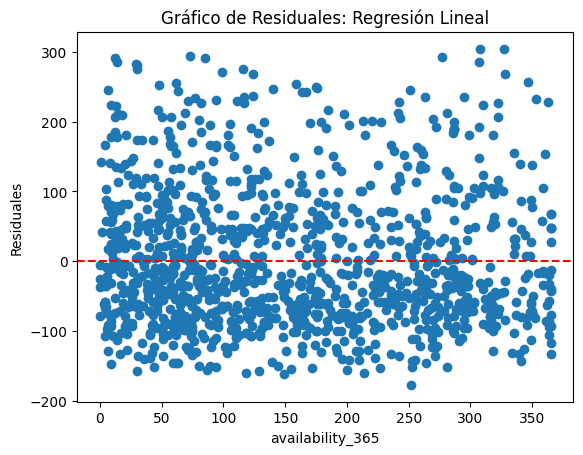

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Suponiendo que ya tienes un DataFrame llamado 'df' con las columnas 'availability_365' y 'price'
X = filtered2[['availability_365']]  # Variable independiente
y = filtered2['price']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predecir los valores
y_pred_linear = linear_model.predict(X_test)

# Graficar los datos reales vs los predichos por el modelo lineal
plt.scatter(X_test, y_test, color='blue', label="Datos reales")
plt.plot(X_test, y_pred_linear, color='red', label="Ajuste Lineal")
plt.title("Regresión Lineal: Disponibilidad vs Precio")
plt.xlabel('availability_365')
plt.ylabel('price')
plt.legend()
plt.show()

# Calcular y graficar los residuales
residuals_linear = y_test - y_pred_linear
plt.scatter(X_test, residuals_linear)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gráfico de Residuales: Regresión Lineal")
plt.xlabel("availability_365")
plt.ylabel("Residuales")
plt.show()



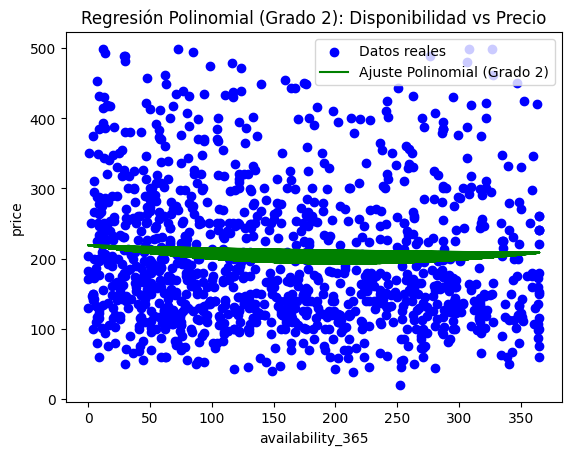

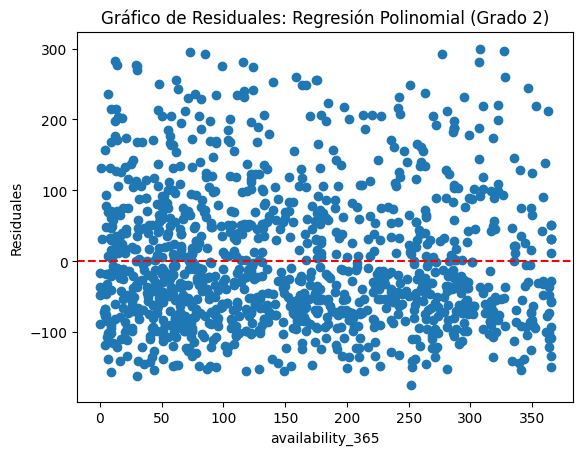

In [140]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Crear características polinomiales de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Ajustar el modelo polinomial
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predecir los valores usando el modelo polinomial
X_test_poly = poly.transform(X_test)  # Transformar los datos de prueba a polinomiales
y_pred_poly = poly_model.predict(X_test_poly)

# Graficar los datos reales vs los predichos por el modelo polinomial
plt.scatter(X_test, y_test, color='blue', label="Datos reales")
plt.plot(X_test, y_pred_poly, color='green', label="Ajuste Polinomial (Grado 2)")
plt.title("Regresión Polinomial (Grado 2): Disponibilidad vs Precio")
plt.xlabel('availability_365')
plt.ylabel('price')
plt.legend()
plt.show()

# Calcular y graficar los residuales del modelo polinomial
residuals_poly = y_test - y_pred_poly
plt.scatter(X_test, residuals_poly)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gráfico de Residuales: Regresión Polinomial (Grado 2)")
plt.xlabel("availability_365")
plt.ylabel("Residuales")
plt.show()


En la regresión lineal podemos evidenciar que los residuales se distribuyen aleatoreamente en la linea roja, por lo que tampoco se puede evidenciar  relaciones polinomiales en la variable. En conclusión, no hay una relación clara de patrones entre la disponibilidad,precio y ratings

#Analisis Impacto Comodidades

Index([' "Smoke alarm"', ' "Kitchen"', ' "Wifi"', ' "Essentials"',
       ' "Hot water"', ' "Hair dryer"', ' "Hangers"', ' "Cooking basics"',
       ' "Carbon monoxide alarm"', ' "Refrigerator"', ' "Microwave"',
       ' "Bed linens"', ' "Iron"', ' "Fire extinguisher"', ' "Shampoo"',
       ' "Clean', ' "Hot water kettle"', ' "Dishes and silverware"',
       ' "Self check-in"', ' "Dishwasher"', ' "Dedicated workspace"',
       ' "Cleaning products"', ' "Bathtub"', ' "Long term stays allowed"',
       ' "Heating"', ' "Washer"', ' "Toaster"', ' "Dining table"',
       ' "First aid kit"', ' "Extra pillows and blankets"'],
      dtype='object')
    "Smoke alarm"   "Kitchen"   "Wifi"   "Essentials"   "Hot water"  \
0               1           0        1              1             1   
1               1           1        1              1             1   
2               1           1        1              1             1   
3               1           1        1              1             1

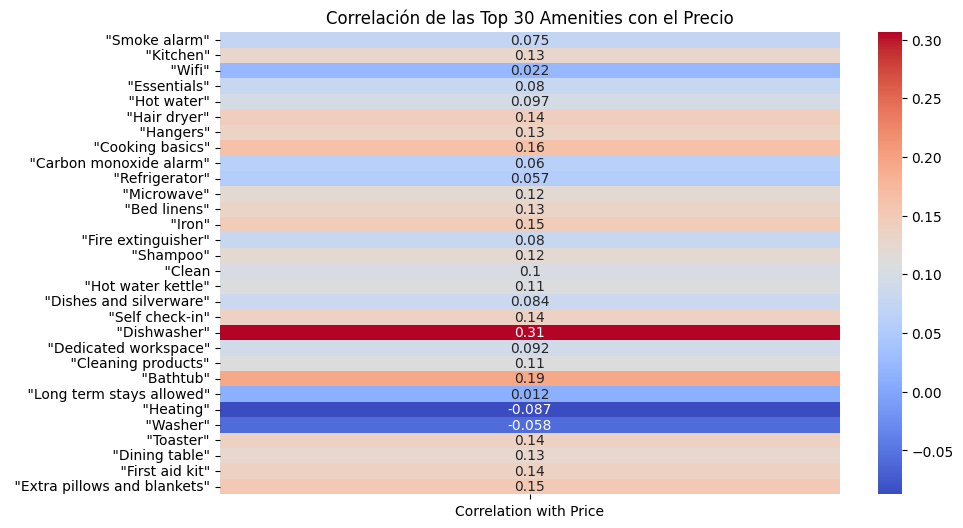

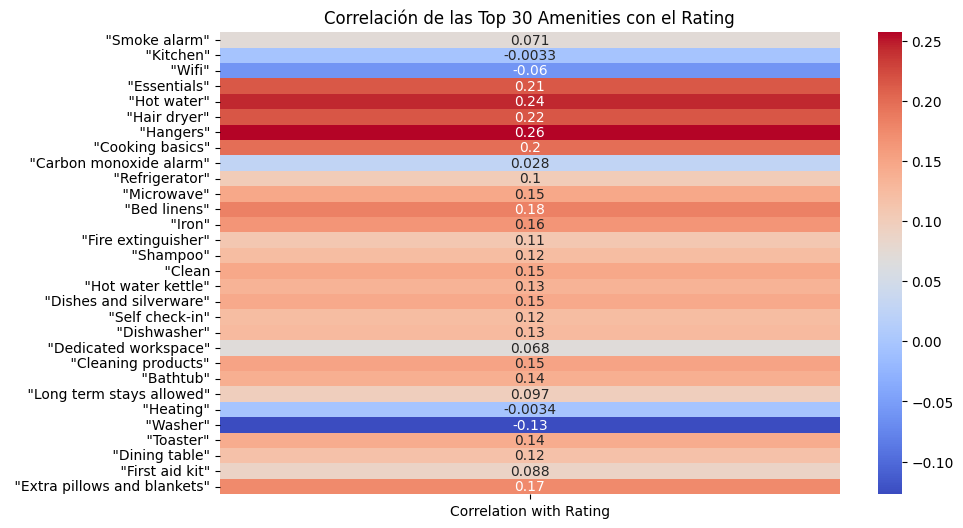

In [202]:
top_10_amenities = totals_sorted.nlargest(30).index

# Ver las top 10 amenities
print(top_10_amenities)

encodedDF_top10 = encodedDF[top_10_amenities]

# Ver el nuevo DataFrame filtrado
print(encodedDF_top10.head())

correlation_price_top10 = encodedDF_top10.corrwith(filtered2['price'])

# Convertir la correlación en un DataFrame
correlation_price_df = pd.DataFrame(correlation_price_top10, columns=['Correlation with Price'])

# Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_price_df, annot=True, cmap='coolwarm')
plt.title("Correlación de las Top 30 Amenities con el Precio")
plt.show()

# Calcular la correlación con el rating
correlation_rating_top10 = encodedDF_top10.corrwith(filtered2['review_scores_rating'])
correlation_rating_df = pd.DataFrame(correlation_rating_top10, columns=['Correlation with Rating'])

# Graficar el heatmap para el rating
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_rating_df, annot=True, cmap='coolwarm')
plt.title("Correlación de las Top 30 Amenities con el Rating")
plt.show()


In [183]:
import pandas as pd

# Calcular la correlación de las amenities con el precio y el rating
correlation_price = encodedDF.corrwith(filtered2['price'].dropna())
correlation_rating = encodedDF.corrwith(filtered2['review_scores_rating'].dropna())

# Crear un DataFrame con ambas correlaciones
correlation_df = pd.DataFrame({
    'Correlation with Price': correlation_price,
    'Correlation with Rating': correlation_rating
})

# Mostrar la matriz de correlación
print(correlation_df)


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encounter

                                                    Correlation with Price  \
 "Shampoo/ conditioner and shower Gel is provid...                     NaN   
 "Mabe stainless steel gas stove"                                -0.012127   
["TV with Chromecast"                                             0.006370   
 "42 inch HDTV with Roku"                                        -0.011884   
 "35 inch TV with standard cable"                                -0.009892   
...                                                                    ...   
["Clothing storage: wardrobe and dresser"                              NaN   
 "Fast wifi \u2013 435 Mbps"                                     -0.012447   
 "Skull Candy sound system with Bluetooth and aux"               -0.005263   
 "Kevin Murphy shampoo"                                                NaN   
 "48 inch TV with Chromecast"                                          NaN   

                                                    Correlation

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encounter

In [198]:
correlation_df.sort_values(by='Correlation with Price', ascending=False)


,Correlation with Price,Correlation with Rating
"""Dishwasher""",0.306286,0.125276
"""Free dryer \u2013 In unit""",0.270026,0.140296
"""Elevator""",0.260217,0.090732
"""Private patio or balcony""",0.245235,0.124752
"""Shared gym in building""",0.223262,0.067301
...,...,...
""" Fulgor Milano stainless steel gas stove""",NaN,NaN
"""Whirlpool stainless steel stove""",NaN,NaN
"[""Clothing storage: wardrobe and dresser""",NaN,NaN
"""Kevin Murphy shampoo""",NaN,NaN


In [197]:
correlation_df.sort_values(by="Correlation with Rating",ascending=False)

,Correlation with Price,Correlation with Rating
"""Hangers""",0.132721,0.256966
"""Hot water""",0.097274,0.243505
"""Hair dryer""",0.142978,0.215941
"""Essentials""",0.079802,0.214770
"""Cooking basics""",0.163003,0.197003
...,...,...
""" Fulgor Milano stainless steel gas stove""",NaN,NaN
"""Whirlpool stainless steel stove""",NaN,NaN
"[""Clothing storage: wardrobe and dresser""",NaN,NaN
"""Kevin Murphy shampoo""",NaN,NaN


In [204]:
correlation_df.sort_values(by="Correlation with Rating",ascending=True)

,Correlation with Price,Correlation with Rating
"[""Fire extinguisher""",-0.081127,-0.348577
"""Wifi""]",-0.094091,-0.283149
"""Fast wifi \u2013 144 Mbps""",0.015011,-0.165835
"[""Free parking on premises""",-0.041333,-0.157979
"""Lock on bedroom door""",-0.333719,-0.142738
...,...,...
""" Fulgor Milano stainless steel gas stove""",NaN,NaN
"""Whirlpool stainless steel stove""",NaN,NaN
"[""Clothing storage: wardrobe and dresser""",NaN,NaN
"""Kevin Murphy shampoo""",NaN,NaN


In [205]:
correlation_df.sort_values(by="Correlation with Price",ascending=True)

,Correlation with Price,Correlation with Rating
"""Lock on bedroom door""",-0.333719,-0.142738
"""Free street parking""",-0.152049,0.085992
"""Dryer""]",-0.116967,-0.092199
"""Dryer""",-0.110316,-0.036702
"[""Hangers""",-0.102593,-0.060148
...,...,...
""" Fulgor Milano stainless steel gas stove""",NaN,NaN
"""Whirlpool stainless steel stove""",NaN,NaN
"[""Clothing storage: wardrobe and dresser""",NaN,NaN
"""Kevin Murphy shampoo""",NaN,NaN


<ipython-input-203-4b1eb70a3ceb>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Average Price': [filtered2[df_top10[amenity] == 1]['price'].mean() for amenity in top_10_amenities]
<ipython-input-203-4b1eb70a3ceb>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Average Price': [filtered2[df_top10[amenity] == 1]['price'].mean() for amenity in top_10_amenities]
<ipython-input-203-4b1eb70a3ceb>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Average Price': [filtered2[df_top10[amenity] == 1]['price'].mean() for amenity in top_10_amenities]
<ipython-input-203-4b1eb70a3ceb>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Average Price': [filtered2[df_top10[amenity] == 1]['price'].mean() for amenity in top_10_amenities]
<ipython-input-203-4b1eb70a3ceb>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Average Price': [fil

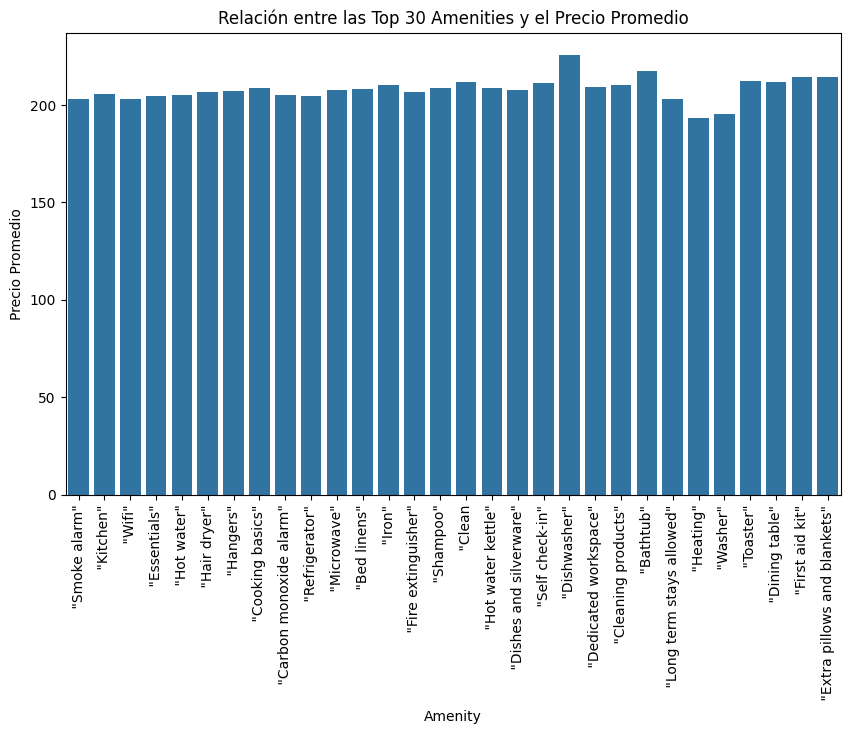

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes df_totals y df con las columnas de precios y demás
# Primero seleccionamos las top 10 amenities más frecuentes
top_10_amenities = df_totals.nlargest(30, 'Total')['Amenity']

# Crear un DataFrame filtrado solo con las top 10 amenities
df_top10 = encodedDF[top_10_amenities]

# Crear un nuevo DataFrame con el precio promedio de las propiedades que tienen cada amenity
# Calcular la presencia de cada amenity y luego el precio promedio asociado
avg_price_per_amenity = pd.DataFrame({
    'Amenity': top_10_amenities,
    'Average Price': [filtered2[df_top10[amenity] == 1]['price'].mean() for amenity in top_10_amenities]
})

# Graficar el barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Amenity', y='Average Price', data=avg_price_per_amenity)
plt.title("Relación entre las Top 30 Amenities y el Precio Promedio")
plt.xlabel("Amenity")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=90)  # Rotar los nombres de las amenities para que sean legibles
plt.show()


Por el lado de las correlaciones lineales observamos que lo que mayor impacto positivo tiene en el precio(mas caro) es el lavavajillas,ascensor,gimnasio y secadora gratis.de correlación negativa tenemos que lo que tiene impacto negativo en el precio(mas barato) es candado en los dormitorios.

En la misma rama, la mayor correlación positiva para los ratings es la presencia de ganchos,agua caliente,secadora de cabello y esenciales.Lo interesante es en las comodidades que más tienen correlación negativa.Vemos la presencia de extintor de incendios y Wifi dos veces,seguido del parqueo libre  en frente del airbnb.

#Conclusiones

En este analisis de datos para oportunidades de inversión de los airbnb en vancouver,vemos algunos puntos críticos que vale la pena considerar:

1.Entre los tipos de habitación, no vale la pena invertir recursos en los **airbnb de cuarto compartido**, pues son los que mas chance tienen de tener un rating mas bajo en comparación a las otras alternativas. Según los ratings la opción mas consistente son los airbnb de hoteles pero si se tiene cierta inclinación a riesgo valdría la pena la inversión en aptos/casas completas o cuartos privados.
En orden de viabilidad del mejor al peor sería

1.Hoteles
2.Casas/Aptos completos
3.Cuartos Privados
4.Cuartos Compartidos

recordando que son relativamente iguales la viabilidad del 2 y 3

2.Vale la pena garantizar en los airbnb que se vayan a invertir que tengan Lavavajillas,Ganchos,Ascensor,Gimnasio,Secadora Gratis,Balcón privado,Secadora para el cabello,Esenciales y Agua caliente.
Hay que evitar cerrar los cuartos de los airbnb

3. Hay que mantener revisión de los servicios de wifi en los airbnb. Esto debido a que su correlación negativa en los ratings no implica que su presencia cause directamente ratings negativos,pero en las variables seleccionadas no hay alguna que pueda explicar el comportamiento de manera apropiada.